In [3]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
from scipy.optimize import curve_fit
from matplotlib.patches import Rectangle

In [4]:
f_mumu = uproot.open("/home/submit/jakedlee/FCCAnalyzer/output_h_bb.root")
print(f_mumu.keys())

['wzp6_ee_nunuH_Hbb_ecm240;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_mumu;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_ee;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_nunu;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_qq;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy;1', 'wzp6_ee_nunuH_Hbb_ecm240/cosThetaMiss_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/ee_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_p_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/ee_p_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/a

The histograms are saved as `process_name/histogram_name`. We have two processes here corresponding to two different generators (Whizard and KKMC) that produces events of Z->mumu. Let's plot the cos(theta_c) distribution for both generators:

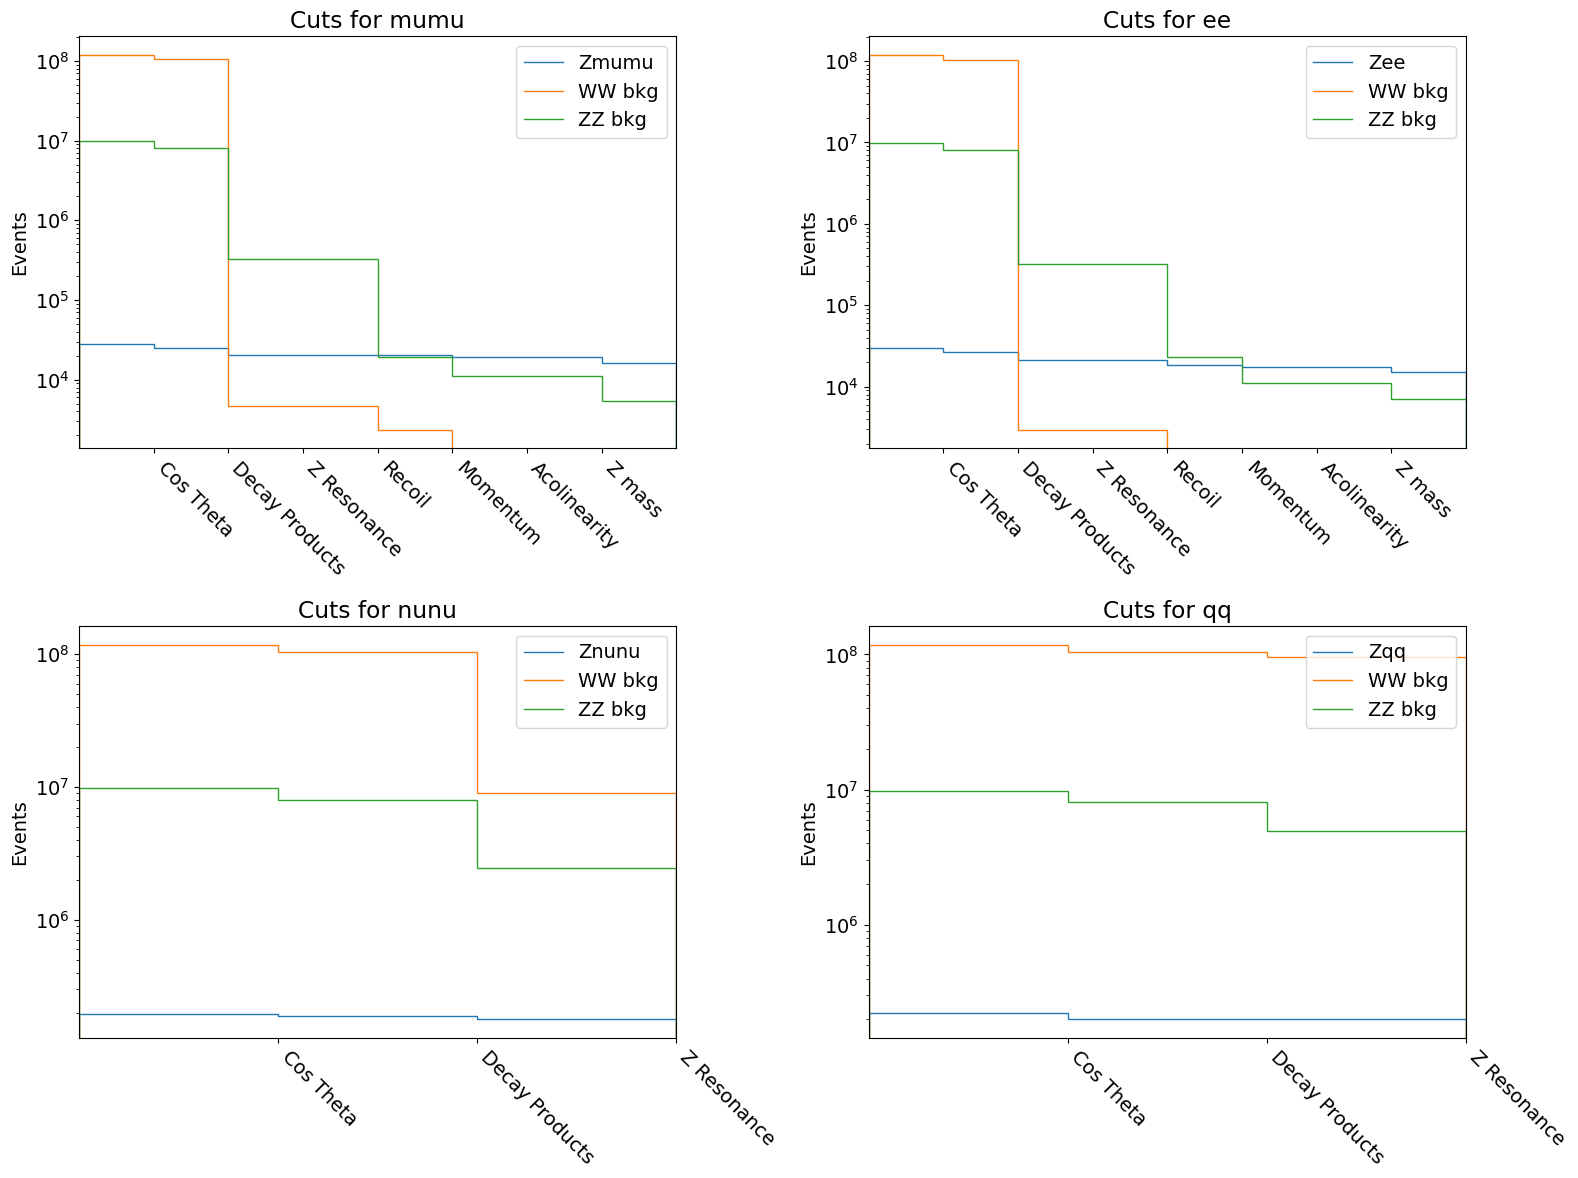

In [5]:
prods = ['mumu', 'ee', 'nunu', 'qq']

cols = 2
rows = int(np.ceil(len(prods) / cols))

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(rows, cols, figsize=(16,12))

for i in range(rows):
    for j in range(cols):
        if i*cols + j < len(prods):
            p = prods[i*cols + j]
        else:
            break
        part = f_mumu[f'wzp6_ee_{p}H_Hbb_ecm240/cutFlow_{p}'].to_hist()
        maxi = np.nonzero(part.values())[0][-1]
        WW   = f_mumu[f'p8_ee_WW_ecm240/cutFlow_{p}'].to_hist()
        ZZ   = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{p}'].to_hist()
        
        ax[i][j].stairs(part.values(), label=f'Z{p}')
        ax[i][j].stairs(WW.values(), label=f'WW bkg')
        ax[i][j].stairs(ZZ.values(), label=f'ZZ bkg')
        
        ax[i][j].legend()
        ax[i][j].set_yscale('log')
        ax[i][j].set_title(f'Cuts for {p}')
        ax[i][j].set_ylabel('Events')
        ax[i][j].set_xlabel('')
        ax[i][j].set_xticks(ticks=[1, 2, 3, 4, 5, 6, 7],
                   labels=['Cos Theta', 'Decay Products', 'Z Resonance', 'Recoil', 'Momentum', 'Acolinearity', 'Z mass'],
                   rotation=-45, ha='left')
        ax[i][j].set_xlim((0, maxi + 1))

plt.tight_layout()
plt.show()

/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/work/submit/submit-software/conda/envs/fcc-ee/lib/python3.10/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


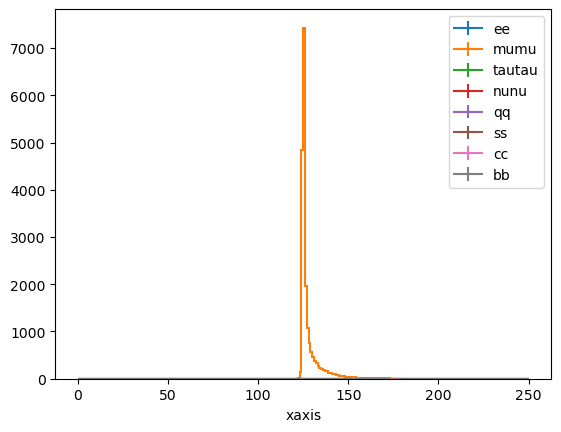

In [20]:
z_products = ['ee', 'mumu', 'tautau', 'nunu', 'qq', 'ss', 'cc', 'bb']

ZZ = f_mumu['p8_ee_ZZ_ecm240/mumu_recoil_m_nOne'].to_hist()
hists = [f_mumu[f'wzp6_ee_{i}H_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist() for i in z_products]
#hists.append(ZZ)
#z_products.append('ZZ')
hep.histplot(hists, label=z_products)#, stack=True)
#plt.xlim(115,140)
plt.legend()
plt.show()

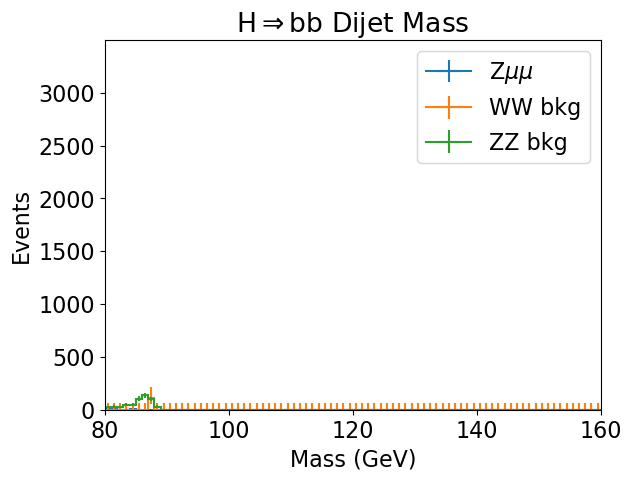

In [67]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_p'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/zmuons_m'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/zmuons_m'].to_hist()
plt.rcParams.update({'font.size': 16})
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.legend()
plt.title("H$\Rightarrow$bb Dijet Mass")
plt.ylabel("Events")
plt.xlabel("Mass (GeV)")
plt.xlim(80,160)
plt.show()

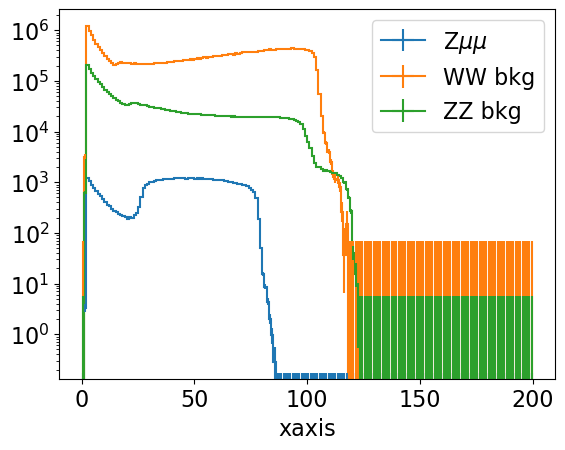

In [81]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/muons_all_p_cut0'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/muons_all_p_cut0'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/muons_all_p_cut0'].to_hist()
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.legend()
plt.yscale('log')
plt.show()

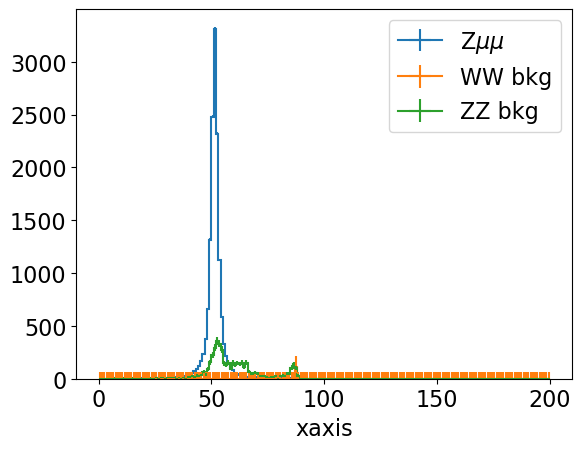

In [86]:
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_p_nOne'].to_hist()
WW   = f_mumu['p8_ee_WW_ecm240/mumu_p_nOne'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/mumu_p_nOne'].to_hist()
hep.histplot([mumu, WW, ZZ], label=['Z$\mu\mu$', 'WW bkg', 'ZZ bkg'])#, stack=True)
plt.legend()
plt.show()

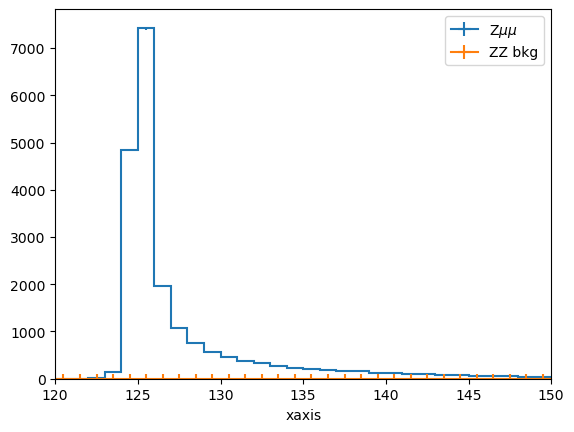

In [32]:
#zmumu_m_nOne
mumu =  f_mumu['wzp6_ee_mumuH_Hbb_ecm240/mumu_recoil_m_nOne'].to_hist()
#ee   =  f_mumu['wzp6_ee_eeH_Hbb_ecm240/muons_all_p_cut0'].to_hist()
#WW   = f_mumu['p8_ee_WW_ecm240/muons_all_p_cut0'].to_hist()
ZZ   = f_mumu['p8_ee_ZZ_ecm240/zmumu_m_nOne'].to_hist()
hep.histplot([mumu, ZZ], label=['Z$\mu\mu$', 'ZZ bkg'])
#hep.histplot(mumu, label='Z$\mu\mu$')
plt.legend()
plt.xlim((120,150))
#plt.ylim((0,50000))
#plt.yscale('log')
plt.show()

In [11]:
def xsec(decay_product):
    L = 7200000
    nums = f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/cutFlow_{decay_product}'].values()
    maxi = np.nonzero(nums)[0][-1]
    A = 1 #nums[2] / nums[0]
    E = nums[maxi] / nums[0]
    Nsig = f_mumu[f'wzp6_ee_{decay_product}H_Hbb_ecm240/cutFlow_{decay_product}'].values()[maxi]
    Nbkg = f_mumu[f'p8_ee_ZZ_ecm240/cutFlow_{decay_product}'].values()[maxi] + f_mumu[f'p8_ee_WW_ecm240/cutFlow_{decay_product}'].values()[maxi]
    Nobs = Nsig + Nbkg

    dNobs = np.sqrt(Nobs)
    dNbkg = np.sqrt(Nbkg)
    dA    = 0 #0.01*A
    dE    = 0.01*E
    dL    = 0.005*L
    dxsec = np.sqrt((dNobs/Nsig)**2 + (dNbkg/Nsig)**2 + (dA/A)**2 + (dE/E)**2 + (dL/L)**2)
    
    xsec = Nsig / (A*E*L)

    print("Acceptance:", A, "\nEfficiency:", E, "\nNsig:", Nsig, "\nNbkg:", Nbkg, "\nNobs:", Nobs)
    print(f"ee->ZH->{decay_product}bb Cross Section:", xsec)
    print("Uncert:", dxsec * 100, "%")
    
    return xsec, dxsec

In [12]:
print("----------------------\n\tmumu\n----------------------")
xsec("mumu")
print("----------------------\n\tee\n----------------------")
xsec("ee")
print("----------------------\n\tnunu\n----------------------")
xsec("nunu")

----------------------
	mumu
----------------------
Acceptance: 1 
Efficiency: 0.5787399999999999 
Nsig: 16417.69632 
Nbkg: 5430.52404 
Nobs: 21848.22036
ee->ZH->mumubb Cross Section: 0.00394
Uncert: 1.5040097311860323 %
----------------------
	ee
----------------------
Acceptance: 1 
Efficiency: 0.49902500000000005 
Nsig: 14986.319580000001 
Nbkg: 7142.8514399999995 
Nobs: 22129.17102
ee->ZH->eebb Cross Section: 0.004171
Uncert: 1.5979221146657132 %
----------------------
	nunu
----------------------
Acceptance: 1 
Efficiency: 0.9208 
Nsig: 178340.544 
Nbkg: 11466638.72928 
Nobs: 11644979.27328
ee->ZH->nunubb Cross Section: 0.0269
Uncert: 2.918318345292069 %


(0.0269, 0.02918318345292069)

In [4]:
f_mumu[f'wzp6_ee_mumuH_Hbb_ecm240/zmuons_m'].to_hist().sum().value

13594.796639999997

In [6]:
f_mumu[f'wzp6_ee_mumuH_Hbb_ecm240/cutFlow_mumu'].to_hist()[7].value

13594.796639999999

In [28]:
f_mumu['wzp6_ee_nunuH_Hbb_ecm240/cutFlow_nunu'].__dict__.keys()

dict_keys(['_cursor', '_file', '_parent', '_concrete', '_members', '_bases', '_num_bytes', '_instance_version', '_is_memberwise', '_values', '_variances'])

In [37]:
dir(f_mumu['wzp6_ee_nunuH_Hbb_ecm240/cutFlow_nunu'].to_hist())

['T',
 '__add__',
 '__annotations__',
 '__array__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__itruediv__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_axis',
 '_clone',
 '_compute_commonindex',
 '_compute_inplace_op',
 '_compute_uhi_index',
 '_export_bh_',
 '_family',
 '_from_histogram_cpp',
 '_from_histogram_object',
 '_generate_axes_',
 '_hist',
 '_import_bh_',
 '_index_transform',
 '_loc_shortcut',
 '_name_to_index',
 '_new_hist',
 '_reduce',
 '_repr_html_',
 '_

In [42]:
np.nonzero(f_mumu['wzp6_ee_nunuH_Hbb_ecm240/cutFlow_nunu'].values())[0][-1]

2

<h1>Analysis of WW Background</h1>

In [48]:
df = uproot.open("/home/submit/jakedlee/FCCAnalyzer/uncut_h_bb.root")
print(df.keys())

['wzp6_ee_nunuH_Hbb_ecm240;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/muons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_p_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_theta_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_phi_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_q_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/electrons_all_no_cut0;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_mumu;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_ee;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_nunu;1', 'wzp6_ee_nunuH_Hbb_ecm240/cutFlow_qq;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy;1', 'wzp6_ee_nunuH_Hbb_ecm240/cosThetaMiss_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/mumu_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/ee_recoil_m_nOne;1', 'wzp6_ee_nunuH_Hbb_ecm240/missingEnergy_vs_zmumu_recoil_m;1', 'wzp6_ee_nunuH_Hbb_ecm240/zmumu_recoil_m_vs_mis

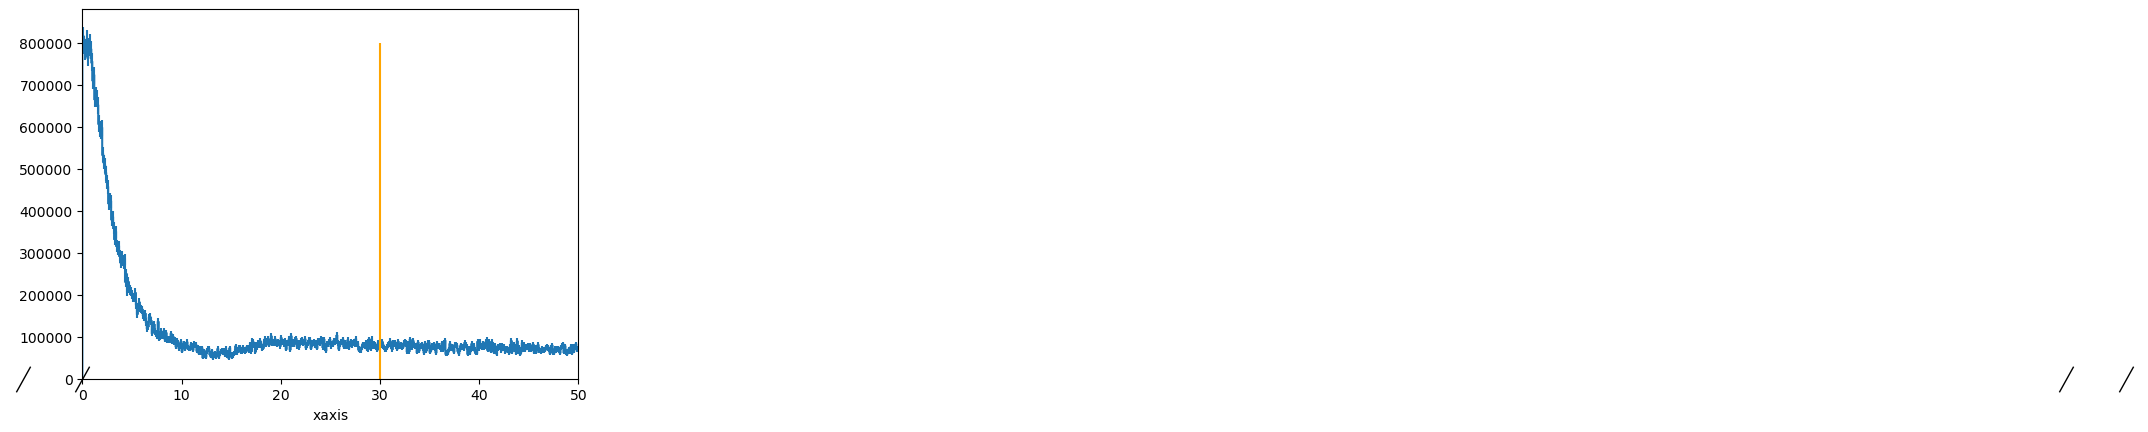

In [49]:
hep.histplot(df['p8_ee_WW_ecm240/missingEnergy'].to_hist())
plt.xlim(0, 50)
plt.vlines(30, 0, 800000, color='orange')
plt.show()

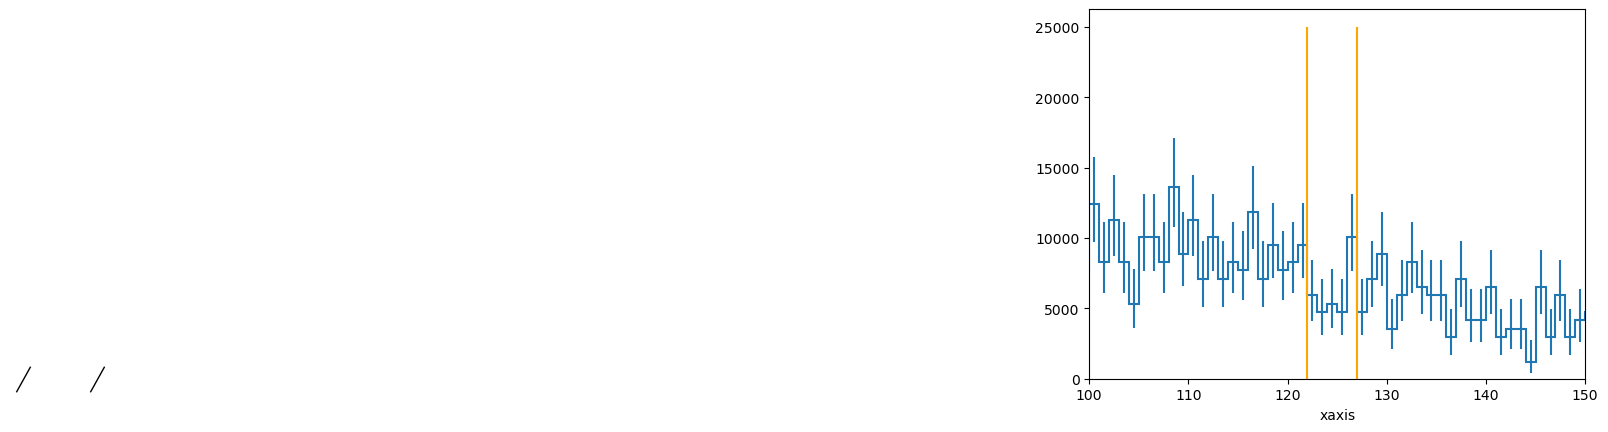

In [50]:
hep.histplot(df['p8_ee_WW_ecm240/mumu_recoil_m_nOne'].to_hist())
plt.xlim(100, 150)
plt.vlines([122, 127], [0, 0], [25000, 25000], colors=['orange', 'orange'])
plt.show()

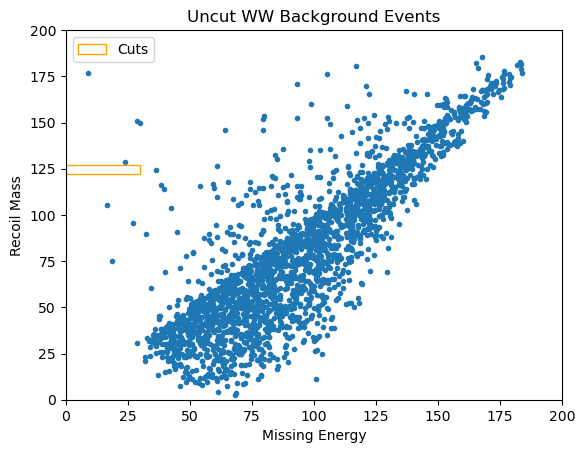

In [55]:
me = df['p8_ee_WW_ecm240/missingEnergy_vs_zmumu_recoil_m'].values()[0]
re = df['p8_ee_WW_ecm240/zmumu_recoil_m_vs_missingEnergy'].values()[0]

plt.scatter(me, re, marker='.')

plt.title("Uncut WW Background Events")
plt.xlabel("Missing Energy")
plt.ylabel("Recoil Mass")

plt.gca().add_patch(Rectangle((0, 122), 30, 5, edgecolor='orange', fill=False, label='Cuts'))

plt.xlim(0, 200)
plt.ylim(0, 200)

plt.legend()
plt.show()